<a href="https://www.kaggle.com/code/hknaralasetty/time-spent-by-people-random-forest-96-accuracy?scriptVersionId=98997099" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/where-is-time-spent-by-the-people-around-the-world/Time-Use-in-OECD-Countries-OECD.csv
/kaggle/input/where-is-time-spent-by-the-people-around-the-world/Time-Use-in-OECD-Countries-OECD.xlsx


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/kaggle/input/where-is-time-spent-by-the-people-around-the-world/Time-Use-in-OECD-Countries-OECD.csv'
data = pd.read_csv(path)
data.sample(5)

,Country,Category,Time (minutes)
349,New Zealand,Attending events,6
279,Latvia,Personal care,40
451,Portugal,Other leisure activities,60
454,Sweden,Other leisure activities,112
192,Turkey,Other unpaid work & volunteering,60


In [4]:
data.rename(columns = {'Time (minutes)': 'Time'}, inplace = True)

In [5]:
data.isnull().sum()

Country     0
Category    0
Time        0
dtype: int64

In [6]:
X, y = data.drop( 'Time', axis = 1 ), data['Time']

In [7]:
from sklearn.model_selection import train_test_split as split_data
X_train, X_test, y_train, y_test = split_data( X, y, test_size = .2, random_state = 66 )

In [8]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
#reference: https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
encoder = MultiColumnLabelEncoder(columns = ['Country', 'Category'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [9]:
X_train.sample(4)

,Country,Category
12,14,7
195,4,6
147,17,10
135,3,10


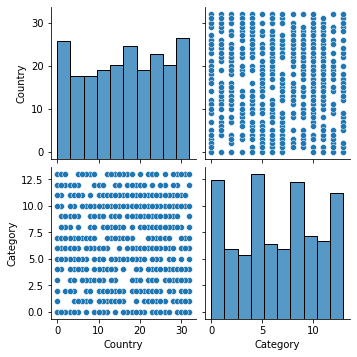

In [10]:
sns.pairplot(X_train)

Graph shows that data is non linear

In [11]:
from sklearn.tree import DecisionTreeRegressor as DTR
dtr = DTR()
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.9278355297641672

In [12]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfr = RFR()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.9560020902719358

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 20, 30, 50, 80, 100],
    'max_features': [2],
    'n_estimators': [10, 30, 50, 100, 200, 500]
}
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'max_depth': [5, 10, 20, 30, 50, 80, 100],
                         'max_features': [2],
                         'n_estimators': [10, 30, 50, 100, 200, 500]})

In [14]:
optimum = CV_rfr.best_params_

In [15]:
rfr = RFR( bootstrap = True, max_depth = optimum['max_depth'], max_features = optimum['max_features'], n_estimators = optimum['n_estimators'])
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.9508481498349324